In [15]:
from matplotlib import pyplot as plt
import numpy as np

timesteps = 50

files = [
    ("baseline", "baseline_fidelities.npz"),
    #("Do nothing", "Do nothing.npz"),
    ("Stabilizer code", "Stabilizer code.npz"),
    #("t=2 optimized BS", "lut_t=2_l=2_w=11_noise=0.0_s=0_trained_on_bloch_sphere.npz"),
    ("b) $\\gamma=0.05$", "lut_t=3_l=2_w=111_noise=0.0_s=1_trained_on_bloch_sphere.npz"),
    ("a) $\\gamma=0.05$", "lut_t=3_l=2_w=111_noise=0.0_s=2_trained_on_discrete_states.npz"),
    ("b) $\\gamma=0.25$", "lut_t=3_l=2_w=111_noise=0.0_s=1_trained_on_bloch_sphere_high_decay.npz"),
    ("a) $\\gamma=0.25$", "lut_t=3_l=2_w=111_noise=0.0_s=2_trained_on_discrete_states_high_decay.npz"),
]

scores =  [0.67279217 0.94367914 0.63328946 0.60112938 0.67935067 0.59892111]


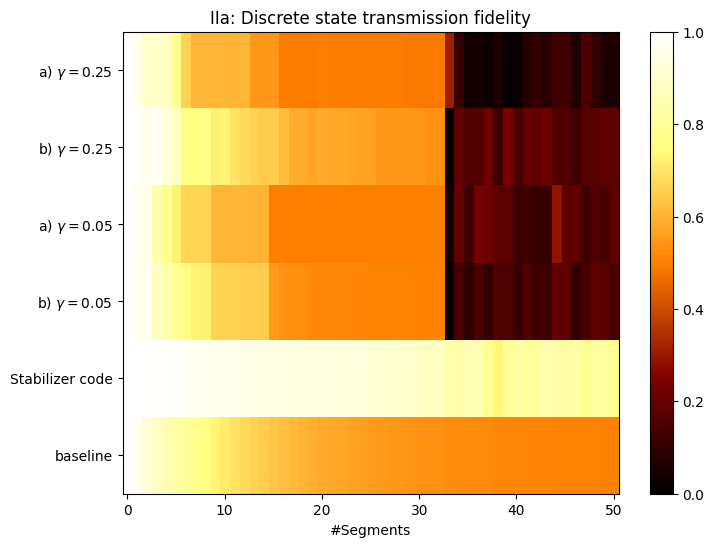

In [17]:
# Open all files, stack to matrix and plot
fidelities_all = np.zeros((len(files), timesteps+1))
labels = []
for i, (label, file) in enumerate(files):
    data = np.load(file)
    fidelities = data["fidelities"]
    fidelities_all[i, :] = fidelities
    labels.append(label)

# Plot the fidelities over time in 2d colormap
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.imshow(
    fidelities_all,
    aspect='auto',
    origin='lower',
    cmap='afmhot',
    vmin=0.0,
    vmax=1.0,
    interpolation='none'
)
fig.colorbar(cax)
ax.set_xlabel('#Segments')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_title('IIa: Discrete state transmission fidelity')
fig.savefig("IIa.png")

print("scores = ", fidelities_all[:,:33].mean(axis=1))